## UNIMELB Grade Distribution

### #1: Data

In [103]:
import numpy as np
core = np.array([78, 82, 51, 86, 87, 80, 71, 85, 81])
elective = np.array([80, 76, 75])
breadth = np.array([86, 84, 81, 77])

### #2: Plots

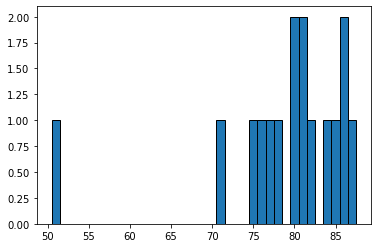

In [104]:
# creating a histogram for easy visualisation
import matplotlib.pyplot as plt

scores = np.concatenate((core, elective, breadth), axis=None)
minsc = min(scores)
maxsc = max(scores)

plt.hist(scores, bins=minsc + np.arange(maxsc+2 - minsc) - 0.5, ec="k")
plt.show()

### note: can anyone plot the data into a dot plot instead of a histogram? 
### it's a lot easier to colour code and differentiate between core/elective/breadth subjects
### also, might wanna use Tableau to make the plot beacuse making it in Python is ... challenging   

Now, I'm wondering whether my grades are distributed normally?

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


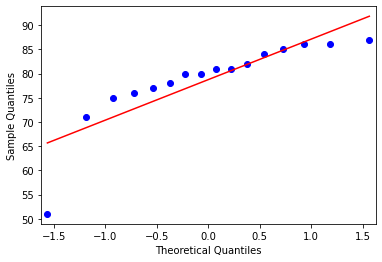

In [105]:
import statsmodels.api as sm
import pylab
sm.qqplot(scores, line='s')
pylab.show()

Oh hey, it looks like there's an obvious outlier. Other than that, the data seems to follow a normal distribution. So, let's do a simple Z-score test to confirm that it is indeed an outlier.

In [107]:
import statistics as stats
mean = stats.mean(scores)
sd = stats.stdev(scores)  # the sample sd formula, not population sd
# detect outliers using a threshold of 2 standard deviations
upper_ths = mean + 2 * sd
lower_ths = mean - 2 * sd
outliers = []
for i in scores:
    if i < lower_ths or i > upper_ths:
        outliers.append(i)
outliers

[51]

Taking out the outlier, the qqplot should look *pretty* close to a normal distribution.

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


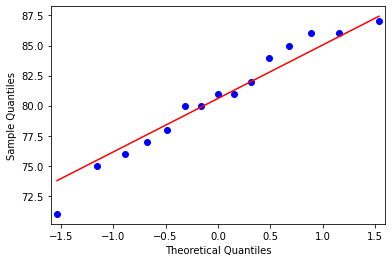

In [109]:
scores2 = np.copy(scores)
for i in outliers:
    scores2 = np.delete(scores2, np.where(scores2 == i))
sm.qqplot(scores2, line='s')
pylab.show()

In [111]:
stats.mean(scores2)

80

#### Conclusion:
I are smart